'''#Perkenalan
Nama : Doni Siahaan

Tujuan dataset ini dibuat untuk mengetahui identitas dan objektif yang ingin dicapai :

-ada berapa jumlah pokemon terkuat?

-ada berapa jumlah pokemon terlemah?

-ada berapa jumlah pokemon tipe legendary dan apa berapa banyak perbedaan dengan tipe common/biasa?


#Library
---



In [114]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

sns.set(context='talk', palette='hls')

#Data Loading

In [85]:
df=pd.read_csv('/content/Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [86]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [87]:
df.shape

(800, 13)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


#Data Cleaning

In [89]:
df_cp=df.rename(columns={'Name':'Nama_Pokemon','Type 1':'Jenis_Pokemon_1','Type 2':'Jenis_Pokemon_2',
                   'Total':'Jumlah_Pokemon','HP':'Bar_HP','Attack':'Damage',
                   'Defense':'Pertahanan','Sp. Atk':'Magic_atk','Sp. Def':'Magic_def','Speed':'Kecepatan',
                   'Generation':'Generasi','Legendary':'Tipe_Legendary'})
df_cp.head()

,#,Nama_Pokemon,Jenis_Pokemon_1,Jenis_Pokemon_2,Jumlah_Pokemon,Bar_HP,Damage,Pertahanan,Magic_atk,Magic_def,Kecepatan,Generasi,Tipe_Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [90]:
df_cp.copy()


,#,Nama_Pokemon,Jenis_Pokemon_1,Jenis_Pokemon_2,Jumlah_Pokemon,Bar_HP,Damage,Pertahanan,Magic_atk,Magic_def,Kecepatan,Generasi,Tipe_Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [91]:
#mengecek apakah ada data yang hilang benar atau tidak
df_cp.isnull().values.any()

True

In [92]:
#mengecek data apa saja yang hilang
df_cp.isna().sum()

#                    0
Nama_Pokemon         0
Jenis_Pokemon_1      0
Jenis_Pokemon_2    386
Jumlah_Pokemon       0
Bar_HP               0
Damage               0
Pertahanan           0
Magic_atk            0
Magic_def            0
Kecepatan            0
Generasi             0
Tipe_Legendary       0
dtype: int64

In [93]:
df[df['Name'].apply(lambda x: 'Mega ' in x)].head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False


In [94]:
df[df['Name'].str.contains('Mega')].head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False


In [95]:
df = df[~df['Name'].str.contains('Mega')]
df.shape

(751, 13)

In [96]:
dp=df_cp.dropna(axis='rows')
dp.head()

,#,Nama_Pokemon,Jenis_Pokemon_1,Jenis_Pokemon_2,Jumlah_Pokemon,Bar_HP,Damage,Pertahanan,Magic_atk,Magic_def,Kecepatan,Generasi,Tipe_Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False


In [97]:
dp.isna().mean()

#                  0.0
Nama_Pokemon       0.0
Jenis_Pokemon_1    0.0
Jenis_Pokemon_2    0.0
Jumlah_Pokemon     0.0
Bar_HP             0.0
Damage             0.0
Pertahanan         0.0
Magic_atk          0.0
Magic_def          0.0
Kecepatan          0.0
Generasi           0.0
Tipe_Legendary     0.0
dtype: float64

In [98]:
dp.describe()

,#,Jumlah_Pokemon,Bar_HP,Damage,Pertahanan,Magic_atk,Magic_def,Kecepatan,Generasi
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,376.565217,456.628019,70.649758,83.173913,79.676329,77.048309,75.565217,70.514493,3.410628
std,212.840297,120.849502,22.896557,33.698473,32.593788,33.805061,27.949961,28.521408,1.663010
min,1.000000,190.000000,1.000000,10.000000,15.000000,10.000000,20.000000,5.000000,1.000000
25%,205.500000,355.000000,55.000000,59.250000,55.000000,50.000000,55.000000,50.000000,2.000000
50%,378.000000,475.000000,70.000000,80.000000,75.500000,70.000000,75.000000,70.000000,3.000000
75%,560.750000,529.500000,85.000000,103.000000,100.000000,100.000000,94.750000,91.000000,5.000000
max,721.000000,780.000000,150.000000,190.000000,230.000000,180.000000,230.000000,160.000000,6.000000


#Explorasi data

In [99]:
#pokemon terkuat
dp[dp['Jumlah_Pokemon'] == dp['Jumlah_Pokemon'].max()]

,#,Nama_Pokemon,Jenis_Pokemon_1,Jenis_Pokemon_2,Jumlah_Pokemon,Bar_HP,Damage,Pertahanan,Magic_atk,Magic_def,Kecepatan,Generasi,Tipe_Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True


In [100]:
#pokemon terlemah
dp[dp['Jumlah_Pokemon'] == dp['Jumlah_Pokemon'].min()]

,#,Nama_Pokemon,Jenis_Pokemon_1,Jenis_Pokemon_2,Jumlah_Pokemon,Bar_HP,Damage,Pertahanan,Magic_atk,Magic_def,Kecepatan,Generasi,Tipe_Legendary
322,298,Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False


In [101]:
len(dp[dp['Tipe_Legendary']])

40

In [102]:
dp[dp['Tipe_Legendary']]['Jenis_Pokemon_1'].value_counts()

Dragon      12
Psychic      5
Fire         4
Ground       3
Electric     3
Steel        3
Rock         3
Ghost        2
Grass        2
Water        1
Dark         1
Ice          1
Name: Jenis_Pokemon_1, dtype: int64

In [103]:
dp.groupby('Tipe_Legendary')['Bar_HP'].agg(['mean','median','std'])

,mean,median,std
Tipe_Legendary,,,
False,67.893048,65,21.360541
True,96.425000,91,20.822679


Jenis Pokemon 1 terbanyak dari Pokemon legendaris adalah dragon, psychic, dan fire. Sementara itu, secara rata-rata dan mediannya atribut HP Pokemon legendaris memang cenderung lebih tinggi. Ini mungkin karena beberapa Pokemon biasa masih merupakan bentuk awal (masih bisa berevolusi) sehingga wajar jika rata-rata HP Pokemon biasa lebih rendah dibandingkan Pokemon legendaris.

In [117]:
plt.rcParams['figure.figsize'] = (12,7)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

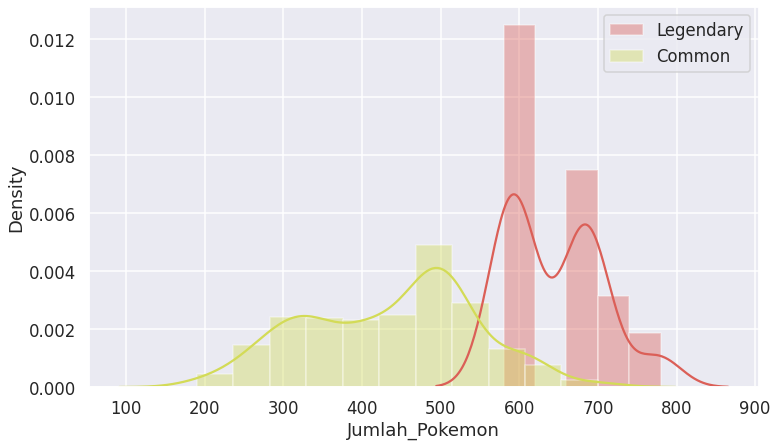

In [126]:
sns.distplot(dp[dp['Tipe_Legendary'] == True]['Jumlah_Pokemon'], label='Legendary')
sns.distplot(dp[dp['Tipe_Legendary'] == False]['Jumlah_Pokemon'], label='Common')
plt.ylabel('Density')
plt.legend()
plt.show

dari visualisasi diatas terlihat bahwa ada perbedaan yang cukup jelas antara Pokemon biasa dengan legendaris. Perbedaan tersebut mulai terlihat batasnya di sekitar nilai total 550

#kesimpulan

In [137]:
dp[(dp['Bar_HP'] > 150) | (dp['Pertahanan'] > 150) | (dp['Magic_def'] > 150)]

,#,Nama_Pokemon,Jenis_Pokemon_1,Jenis_Pokemon_2,Jumlah_Pokemon,Bar_HP,Damage,Pertahanan,Magic_atk,Magic_def,Kecepatan,Generasi,Tipe_Legendary
87,80,SlowbroMega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False
98,91,Cloyster,Water,Ice,525,50,95,180,85,45,70,1,False
103,95,Onix,Rock,Ground,385,35,45,160,30,45,70,1,False
223,208,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
269,249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
332,306,Aggron,Steel,Rock,530,70,110,180,60,60,50,3,False
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True


dari data diatas ternyata rata2 pokemon common/biasa masih memiliki status lebih baik dari legendary dan tidak kemungkinan bisa diatas legendary

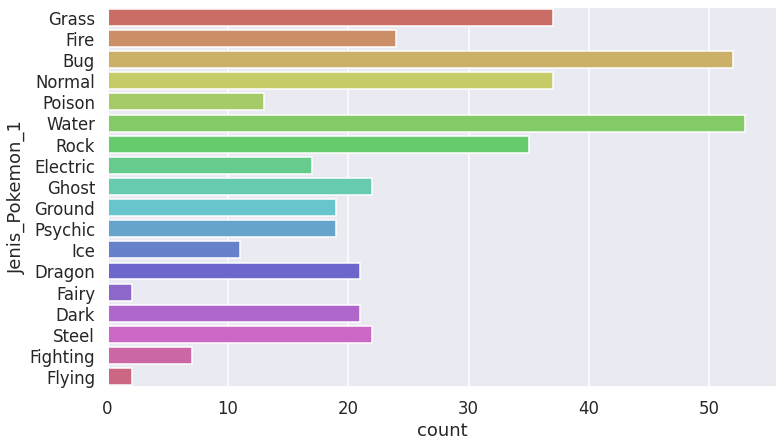

In [130]:
sns.countplot(y='Jenis_Pokemon_1', data=dp, palette='hls');

dari data diatas jenis pokemon 1 yang mendominasi adalah tipe water dan fire

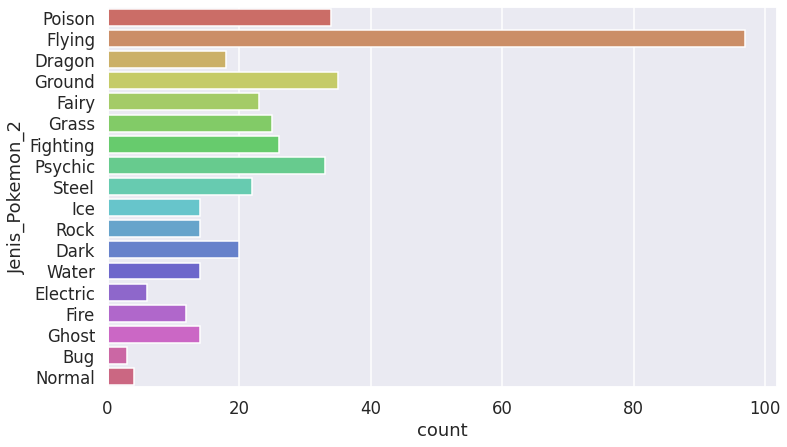

In [131]:
sns.countplot(y='Jenis_Pokemon_2', data=dp, palette='hls');

sedangkan untuk jenis pokemon ke 2 yaitu tipe flying